## Trying to build a one dimentional learning rule

This is based on the COVIS paragdimn for learning in multiple categorization systems

Why:
To do my final exam project I need both a verbal (one dimentional) learning rule and a parralel learning rule through the stiatum. These two pathways will compete in order to give the best response. 
Therefore, I will start by building a simple one dimentional rule in categorisation

COVIS paper: A neuropsychological theory of multiple systems in category learning
link: https://pubmed.ncbi.nlm.nih.gov/9697427/

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

Make the matrix of the visual stimuli

Attempt 3:
Here i make the numpy array by manually making the x,y coordinates through gausian sampling

Shape of the 4D array: (100, 3)


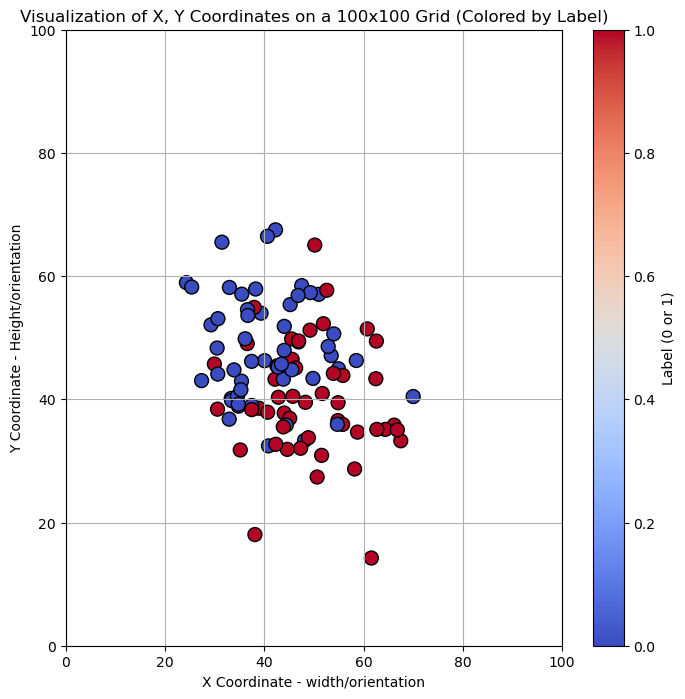

In [8]:
import numpy as np

# Define dimensions (timepoints, 1 x value per timepoint) - this is the number of trials i simulate
timepoints = 100

# Means and standard deviations for Gaussian distributions
std_dev = 9
mean_0x = 40  # For answer = 0
mean_0y = 50 
mean_1x = 50 # For answer = 1
mean_1y = 40

# Initialize arrays
x_values = np.zeros(timepoints)
y_values = np.zeros(timepoints)
answer_values = np.zeros(timepoints)

# Generate data for each timepoint
for t in range(timepoints):
    # Randomly decide answer value (0 or 1)
    answer = np.random.choice([0, 1])
    answer_values[t] = answer
    
    # Generate x and y values based on answer
    if answer == 0:
        x_values[t] = np.random.normal(mean_0x, std_dev)
        y_values[t] = np.random.normal(mean_0y, std_dev)
    else:
        x_values[t] = np.random.normal(mean_1x, std_dev)
        y_values[t] = np.random.normal(mean_1y, std_dev)

# Stack the values into a 4D array (timepoints, 1 value per x, y, and answer)
visual_values = np.stack((x_values, y_values, answer_values), axis=-1)

# Print the resulting array
print(f"Shape of the 4D array: {visual_values.shape}")
#print("Sample values from the array:")
#print(visual_values)

# Visualize the x, y coordinates on a 100x100 grid
plt.figure(figsize=(8, 8))
plt.scatter(x_values, y_values, c=answer_values, cmap='coolwarm', edgecolors='k', s=100)
plt.colorbar(label='Label (0 or 1)')  # Color bar to indicate the labels
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('X Coordinate - width/orientation')
plt.ylabel('Y Coordinate - Height/orientation')
plt.title('Visualization of X, Y Coordinates on a 100x100 Grid (Colored by Label)')
plt.grid(True)
plt.show()

In [9]:
# Get unique categories and their counts
unique, counts = np.unique(answer_values, return_counts=True)

# Calculate chance level
total_count = len(answer_values)
chance_level = max(counts) / total_count

print(f"Chance level: {chance_level}")

Chance level: 0.52


In [10]:
best_rule_y = None
best_accuracy_y = 0

for rule in np.arange(0, 100, 0.1):  # Try thresholds from 30 to 59.5
    guesses = np.where(y_values < rule, 1, 0)
    acc = np.mean(guesses == answer_values)
    
    if acc > best_accuracy_y:
        best_accuracy_y = acc
        best_rule_y = rule

print(f"Best rule on the y-axis: y > {round(best_rule_y, 2)} — Accuracy: {best_accuracy_y:.2f}")

Best rule on the y-axis: y > 38.6 — Accuracy: 0.72


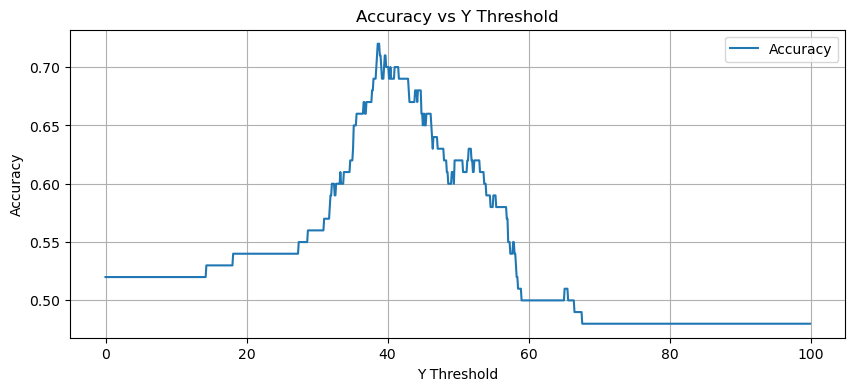

In [11]:
import matplotlib.pyplot as plt

rules = np.arange(0, 100, 0.1)
accuracies = []

for rule in rules:
    guesses = np.where(y_values < rule, 1, 0)
    acc = np.mean(guesses == answer_values)
    accuracies.append(acc)

plt.figure(figsize=(10, 4))
plt.plot(rules, accuracies, label='Accuracy')
plt.xlabel('Y Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Y Threshold')
plt.grid(True)
plt.legend()
plt.show()


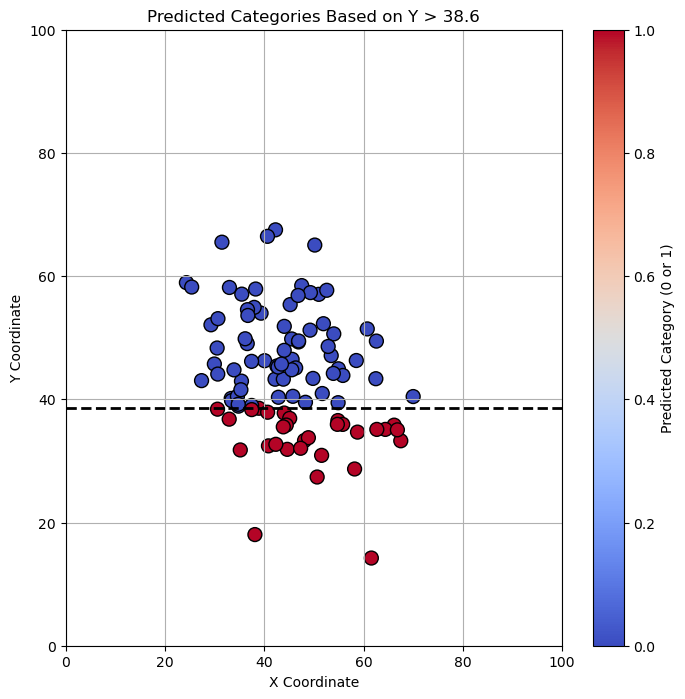

In [12]:
import matplotlib.pyplot as plt

# Use best rule for x
y_guesses = np.where(y_values < best_rule_y, 1, 0)

# Plot: Color by predicted category (0 or 1)
plt.figure(figsize=(8, 8))
plt.scatter(x_values, y_values, c=y_guesses, cmap='coolwarm', edgecolors='k', s=100)
plt.colorbar(label='Predicted Category (0 or 1)')
plt.axhline(y=best_rule_y, color='black', linestyle='--', linewidth=2, label=f'x = {round(best_rule_y, 2)}')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Predicted Categories Based on Y > {round(best_rule_y, 2)}')
plt.grid(True)
plt.show()

In [13]:
best_rule_x = None
best_accuracy_x = 0

for rule in np.arange(0, 100, 0.1):  # Try thresholds from 30 to 59.5
    guesses = np.where(x_values > rule, 1, 0)
    acc = np.mean(guesses == answer_values)
    
    if acc > best_accuracy_x:
        best_accuracy_x = acc
        best_rule_x = rule

print(f"Best rule on the x-axis: x > {round(best_rule_x, 2)} — Accuracy: {best_accuracy_x:.2f}")

Best rule on the x-axis: x > 44.5 — Accuracy: 0.69


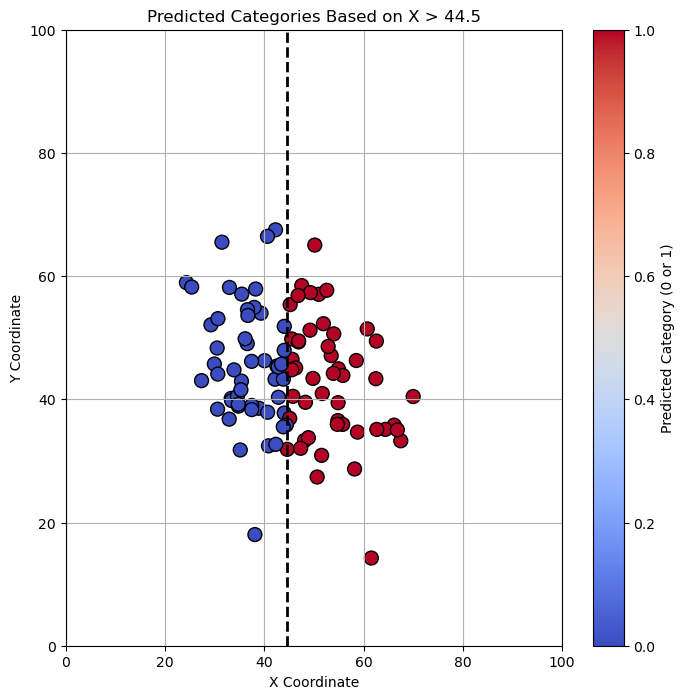

In [14]:
import matplotlib.pyplot as plt

# Use best rule for x
x_guesses = np.where(x_values > best_rule_x, 1, 0)

# Plot: Color by predicted category (0 or 1)
plt.figure(figsize=(8, 8))
plt.scatter(x_values, y_values, c=x_guesses, cmap='coolwarm', edgecolors='k', s=100)
plt.colorbar(label='Predicted Category (0 or 1)')
plt.axvline(x=best_rule_x, color='black', linestyle='--', linewidth=2, label=f'x = {round(best_rule_x, 2)}')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Predicted Categories Based on X > {round(best_rule_x, 2)}')
plt.grid(True)
plt.show()



Trying to find the optimal rule as a linear line

In [15]:
import numpy as np

best_a = None
best_b = None
best_accuracy = 0

a_values = np.linspace(-5, 5, 100)     # Try slopes from -5 to 5
b_values = np.linspace(-100, 100, 100) # Try intercepts from -100 to 100

for a in a_values:
    for b in b_values:
        # Predict class 1 if point is *below* the line y < ax + b
        guesses = np.where(y_values < a * x_values + b, 1, 0)
        acc = np.mean(guesses == answer_values)
        
        if acc > best_accuracy:
            best_accuracy = acc
            best_a = a
            best_b = b

print(f"Best linear rule: y < {best_a:.2f} * x + {best_b:.2f} — Accuracy: {best_accuracy:.2f}")


Best linear rule: y < 0.35 * x + 25.25 — Accuracy: 0.78


Trying to save the finding a optimal rule as a video

run this in terminal: conda install -c conda-forge ffmpeg

Best rule: y > 1.02 * x + 2.04 — Accuracy: 0.76


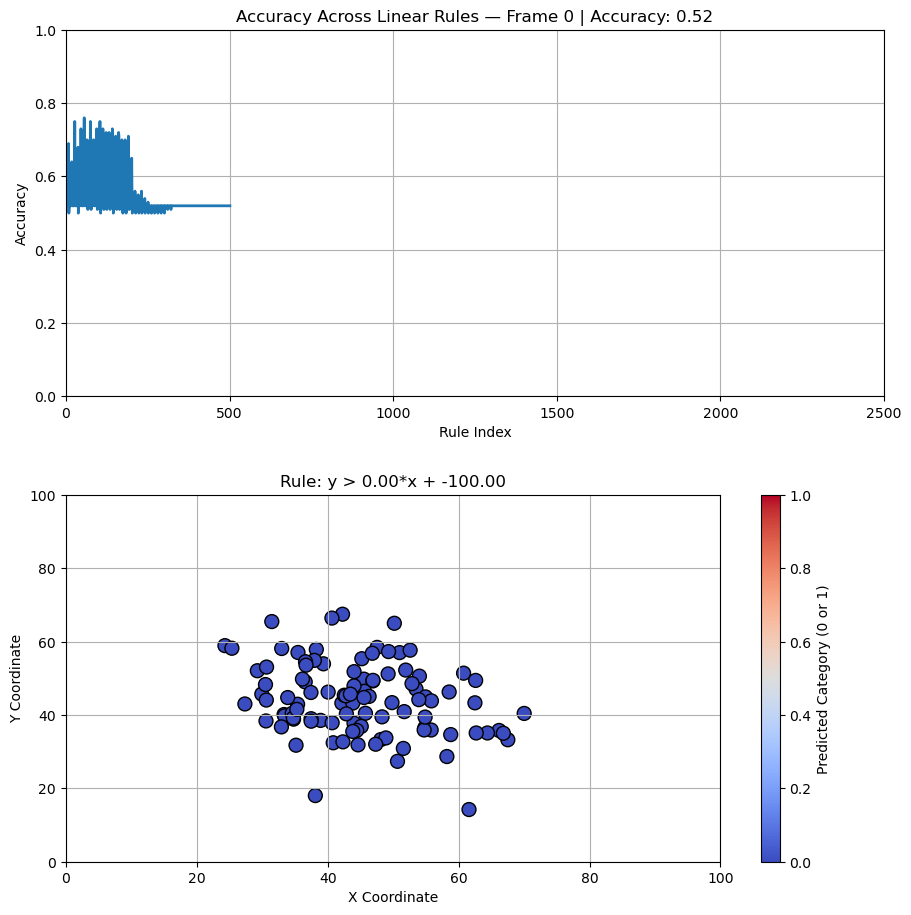

In [16]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os

# Set ffmpeg path 
mpl.rcParams['animation.ffmpeg_path'] = '/Users/johannesejrskildrejsenhus/miniconda3/bin/ffmpeg'

# Ensure video directory exists
os.makedirs("../videos", exist_ok=True)

# Clear previous history
acc_history = []
guess_history = []

# Define grid of linear rules
a_values = np.linspace(0, 10, 50)  # x slopes
b_values = np.linspace(-100, 100, 50) # y intercepts
rule_grid = [(a, b) for a in a_values for b in b_values]
N = len(rule_grid)

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
fig.tight_layout(pad=5)

# Top plot: accuracy
accuracy_line, = ax1.plot([], [], lw=2)
ax1.set_xlim(0, N)
ax1.set_ylim(0, 1)
ax1.set_xlabel('Rule Index')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Across Linear Rules')
ax1.grid(True)

# Bottom plot: scatter + decision line
scatter = ax2.scatter(x_values, y_values, c=np.zeros_like(answer_values), cmap='coolwarm', edgecolors='k', s=100, vmin=0, vmax=1)
decision_line, = ax2.plot([], [], 'k--', linewidth=2)
ax2.set_xlim(0, 100)
ax2.set_ylim(0, 100)
ax2.set_xlabel('X Coordinate')
ax2.set_ylabel('Y Coordinate')
ax2.set_title('Predictions with Linear Rule')
ax2.grid(True)

# Optional: add colorbar
fig.colorbar(scatter, ax=ax2, label='Predicted Category (0 or 1)')

# Update function
def update(frame):
    a, b = rule_grid[frame]
    # Try both directions to find best match
    pred1 = np.where(y_values > a * x_values + b, 1, 0)
    acc1 = np.mean(pred1 == answer_values)

    pred2 = 1 - pred1  # Flip predictions
    acc2 = np.mean(pred2 == answer_values)

    # Use the direction with higher accuracy
    if acc2 > acc1:
        guesses = pred2
        acc = acc2
    else:
        guesses = pred1
        acc = acc1

    acc_history.append(acc)
    guess_history.append((a, b, acc))

    accuracy_line.set_data(range(len(acc_history)), acc_history)
    scatter.set_array(guesses)

    # Update decision line
    x_line = np.array([0, 100])
    y_line = a * x_line + b
    decision_line.set_data(x_line, y_line)

    ax1.set_title(f'Accuracy Across Linear Rules — Frame {frame} | Accuracy: {acc:.2f}')
    ax2.set_title(f'Rule: y > {a:.2f}*x + {b:.2f}')

    return accuracy_line, scatter, decision_line

# Animate and save
#ani = FuncAnimation(fig, update, frames=N, blit=False, interval=100)
ani = FuncAnimation(fig, update, frames=range(0, N, 5), blit=False, interval=50)
ani.save("../videos/optimal_rule_twoDim.mp4", writer="ffmpeg", fps=10)

# Print best rule and accuracy
best_idx = np.argmax(acc_history)
best_a, best_b, best_acc = guess_history[best_idx]
print(f"Best rule: y > {best_a:.2f} * x + {best_b:.2f} — Accuracy: {best_acc:.2f}")


Best rule: y > 1.02 * x + -2.04 — Accuracy: 0.89


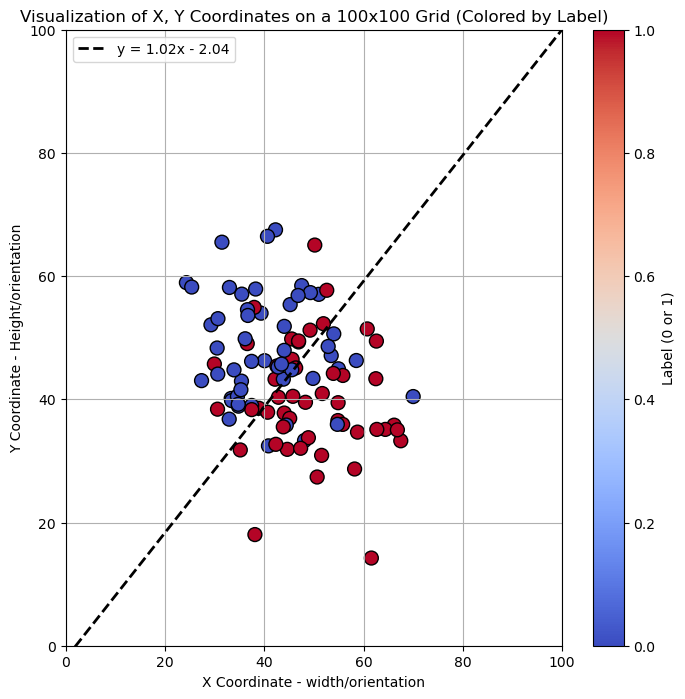

In [17]:
# Visualize the x, y coordinates on a 100x100 grid
plt.figure(figsize=(8, 8))
plt.scatter(x_values, y_values, c=answer_values, cmap='coolwarm', edgecolors='k', s=100)
plt.colorbar(label='Label (0 or 1)')  # Color bar to indicate the labels

# Add decision boundary: 
x_line = np.array([0, 100])
y_line = best_a * x_line - best_b
plt.plot(x_line, y_line, 'k--', linewidth=2, label='y = 1.02x - 2.04')

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('X Coordinate - width/orientation')
plt.ylabel('Y Coordinate - Height/orientation')
plt.title('Visualization of X, Y Coordinates on a 100x100 Grid (Colored by Label)')
plt.grid(True)
plt.legend()
plt.show()



## Trying to make a verbal system update


In [18]:
class VerbalSystem:
    def __init__(self, init_criterion, learning_rate=0.388, decay=42, momentum=0.9332):
        self.criterion = init_criterion  # x-threshold for classification
        self.learning_rate_0 = learning_rate
        self.decay = decay
        self.momentum = momentum
        self.prev_update = 0.0
        self.num_errors = 0  # total number of errors seen

    def predict(self, x):
        """Make a binary prediction based on x-coordinate and current criterion."""
        return int(x > self.criterion)

    def update(self, x, true_label):
        """Update criterion based on one (x, y, label) input."""
        prediction = self.predict(x)
        error = true_label - prediction  # can be -1, 0, or +1

        if error != 0:
            self.num_errors += 1

        # Learning rate annealing
        eta = self.learning_rate_0 / (1 + (self.num_errors / self.decay))

        # Gradient step: if we underpredict (pred 0, label 1), move criterion left (decrease)
        # if we overpredict (pred 1, label 0), move criterion right (increase)
        gradient = -error  # move toward correct boundary

        # Update with momentum
        delta = eta * gradient + self.momentum * self.prev_update
        self.criterion += delta

        # Store for next iteration
        self.prev_update = delta

        return prediction, self.criterion



In [19]:
# Shuffle the visual_values array along the first axis (trials)
shuffled_visual_values = visual_values.copy()
np.random.shuffle(shuffled_visual_values)


# Initialize the verbal system with a criterion of 50
vs = VerbalSystem(init_criterion=43)

# Prepare to track performance
predictions = []
correct = []
criteria = []

for trial, (x, y, label) in enumerate(shuffled_visual_values):
    pred, updated_crit = vs.update(x, label)
    predictions.append(pred)
    correct.append(int(pred == label))
    criteria.append(updated_crit)


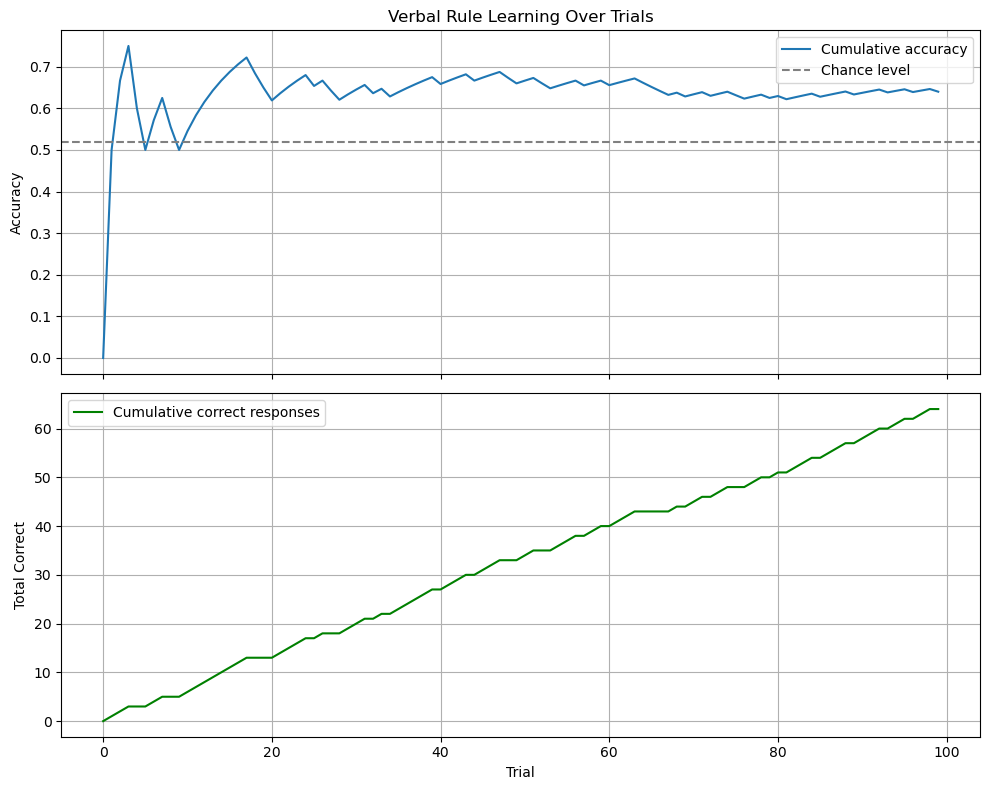

In [20]:
# First compute cumulative values
cumulative_accuracy = np.cumsum(correct) / np.arange(1, len(correct) + 1)
cumulative_correct = np.cumsum(correct)

# Create two vertically stacked subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# --- First plot: Cumulative Accuracy ---
axs[0].plot(cumulative_accuracy, label='Cumulative accuracy')
axs[0].axhline(chance_level, linestyle='--', color='gray', label='Chance level')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Verbal Rule Learning Over Trials')
axs[0].legend()
axs[0].grid(True)

# --- Second plot: Cumulative Correct ---
axs[1].plot(cumulative_correct, color='green', label='Cumulative correct responses')
axs[1].set_xlabel('Trial')
axs[1].set_ylabel('Total Correct')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


I am starting with trying to make the learning rate dynamic

In [21]:
class VerbalSystemDynamic:
    def __init__(self, init_criterion, learning_rate=0.388, decay=42, momentum=0.9332):
        self.criterion = init_criterion  # x-threshold for classification
        self.learning_rate_0 = learning_rate
        self.decay = decay
        self.momentum = momentum
        self.prev_update = 0.0
        self.num_errors = 0
        self.confidence = 50.0  # starts at chance level (0–100 scale)

    def predict(self, x):
        return int(x > self.criterion)

    def update(self, x, true_label):
        prediction = self.predict(x)
        error = true_label - prediction

        if error != 0:
            self.num_errors += 1
            self.confidence = max(1.0, self.confidence - 5.0)  # penalize
        else:
            self.confidence = min(100.0, self.confidence + 2.0)  # reward

        # Inverse confidence weighting — more confident → smaller eta
        # Normalize confidence to 0.01–1.0 range for stability
        confidence_weight = 1.0 - (self.confidence / 100.0)  # 1.0 → low confidence, 0.0 → high
        eta = self.learning_rate_0 * confidence_weight

        # Optionally add decay over time too
        eta = eta / (1 + (self.num_errors / self.decay))

        gradient = -error
        delta = eta * gradient + self.momentum * self.prev_update
        self.criterion += delta
        self.prev_update = delta

        return prediction, self.criterion, self.confidence


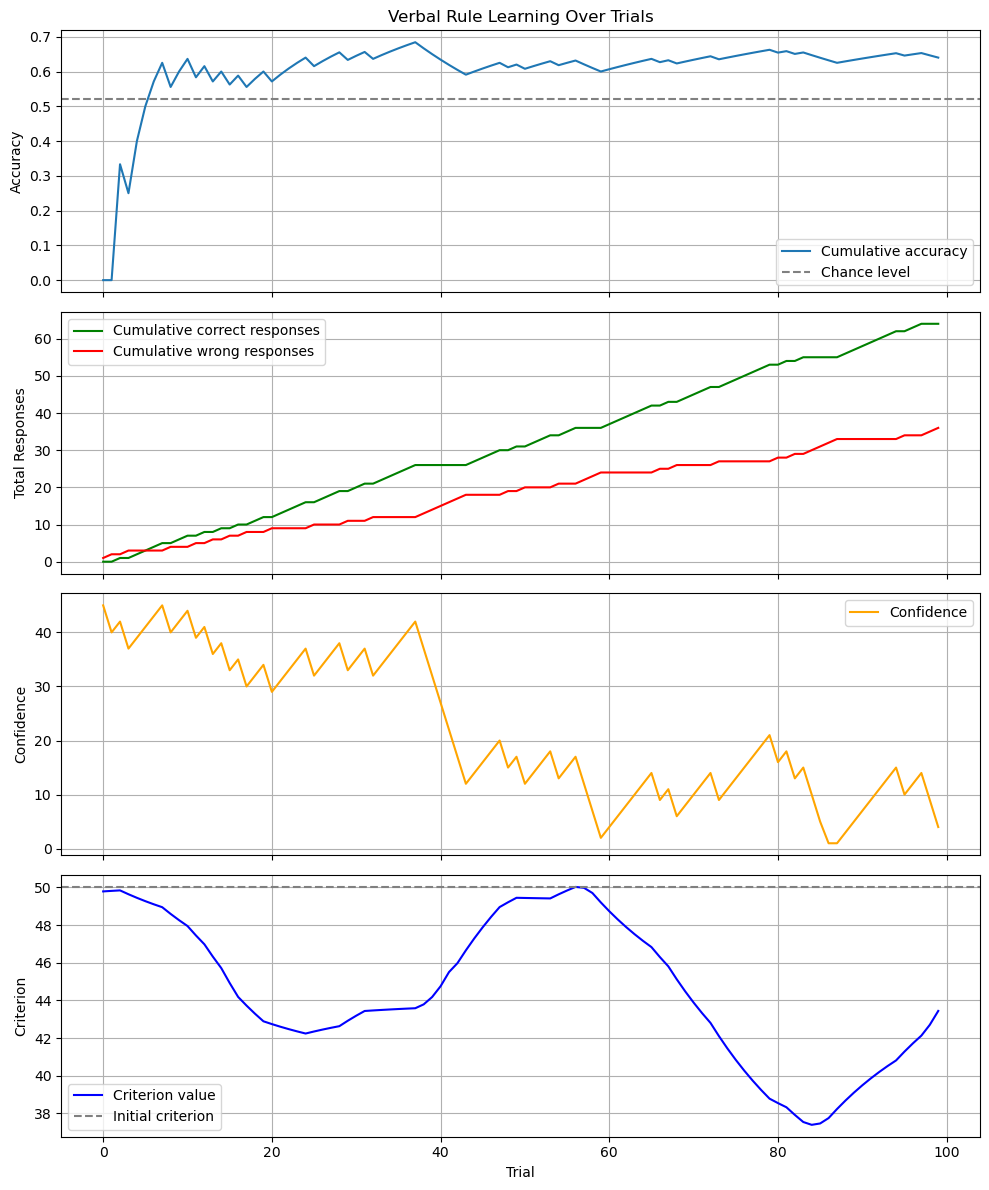

In [22]:
# Shuffle the visual_values array along the first axis (trials)
shuffled_visual_values = np.column_stack((x_values, y_values, answer_values))
np.random.shuffle(shuffled_visual_values)

# Initialize the verbal system with a criterion of 43
vs = VerbalSystemDynamic(init_criterion=50)

# Prepare to track performance
predictions = []
correct = []
criteria = []
confidences = []
wrong = []  # To track wrong responses

for trial, (x, y, label) in enumerate(shuffled_visual_values):
    pred, updated_crit, confidence = vs.update(x, label)
    predictions.append(pred)
    correct.append(int(pred == label))
    wrong.append(int(pred != label))  # Increment wrong if prediction doesn't match label
    criteria.append(updated_crit)
    confidences.append(confidence)

# First compute cumulative values
cumulative_accuracy = np.cumsum(correct) / np.arange(1, len(correct) + 1)
cumulative_correct = np.cumsum(correct)
cumulative_wrong = np.cumsum(wrong)  # Cumulative wrong responses

# Create four vertically stacked subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# --- First plot: Cumulative Accuracy ---
axs[0].plot(cumulative_accuracy, label='Cumulative accuracy')
axs[0].axhline(chance_level, linestyle='--', color='gray', label='Chance level')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Verbal Rule Learning Over Trials')
axs[0].legend()
axs[0].grid(True)

# --- Second plot: Cumulative Correct and Wrong ---
axs[1].plot(cumulative_correct, color='green', label='Cumulative correct responses')
axs[1].plot(cumulative_wrong, color='red', label='Cumulative wrong responses')
axs[1].set_ylabel('Total Responses')
axs[1].legend()
axs[1].grid(True)

# --- Third plot: Confidence ---
axs[2].plot(confidences, color='orange', label='Confidence')
axs[2].set_ylabel('Confidence')
axs[2].legend()
axs[2].grid(True)

# --- Fourth plot: Criterion over trials ---
axs[3].plot(criteria, color='blue', label='Criterion value')
axs[3].axhline(y=50, color='gray', linestyle='--', label='Initial criterion')
axs[3].set_xlabel('Trial')
axs[3].set_ylabel('Criterion')
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()



Next, I have to :
- Figure out why fig 6 have "number of correct responses" on the y-axis - read the original paper <-  Is behind a paywall :(
- Try to make a framework, which have the parrallel pathways - Draw it out
- Stack simulations to see how accurate the verbal route is on average <- Am I even doing it correctly? I want to start over and code the visual imput as a gridspace rather than coordinates, if that makes sense? Maybe wait and ask Matthew. 
- Investigate exactly how the update occurs, so i can make a threshold/criterion of accuracy - I have tried to do this and implement a confidence that changes how the learning is updates - more dynamical. Am i overfitting - what plots should I replicate?
 
Here it is also important to note that the plots have one wierd axis, but somehow also seems as if the learning suddenly "jumps". Maybe i should see if I can implement blocks as done here instead of the 100 continous trials. But I'm also pretty sure the plots are of the dual processing system. 
Maybe make the data more random so the optimal x rule is further from the optimal xy rule. 
- Simulate with the criterion of accuracy

Hope I can get some done before monday

The Criterion (the rule) looks shit. So I will try to update the Verbal system (dynamic), so it actually tries to learn something?

In [38]:
class VerbalSystemDynamic2:
    def __init__(self, init_criterion=50, learning_rate_0=0.1, decay=10, confidence_baseline=50):
        self.criterion = init_criterion
        self.learning_rate_0 = learning_rate_0
        self.decay = decay
        self.confidence = confidence_baseline
        self.num_errors = 0
        self.correct_history = []

    def update(self, x_value, label):
        # Predict based on current criterion (simple rule: x > criterion => label=1)
        prediction = int(x_value > self.criterion)
        is_correct = prediction == label

        # Track correctness
        self.correct_history.append(is_correct)

        # Confidence update: moving average of past 10 trials
        if len(self.correct_history) >= 10:
            recent_accuracy = np.mean(self.correct_history[-10:])
        else:
            recent_accuracy = np.mean(self.correct_history)

        # Confidence is proportional to recent accuracy
        self.confidence = max(1e-6, 100 * recent_accuracy)

        # Learning rate adjusts with performance and error count
        eta = self.learning_rate_0 / (1 + self.num_errors / self.decay)

        # Update criterion only if wrong
        if not is_correct:
            self.num_errors += 1
            # Move the criterion in the direction that would have made the prediction correct
            if prediction == 1:
                self.criterion += eta  # Move right: reduce false positives
            else:
                self.criterion -= eta  # Move left: reduce false negatives

        return prediction, self.criterion, self.confidence


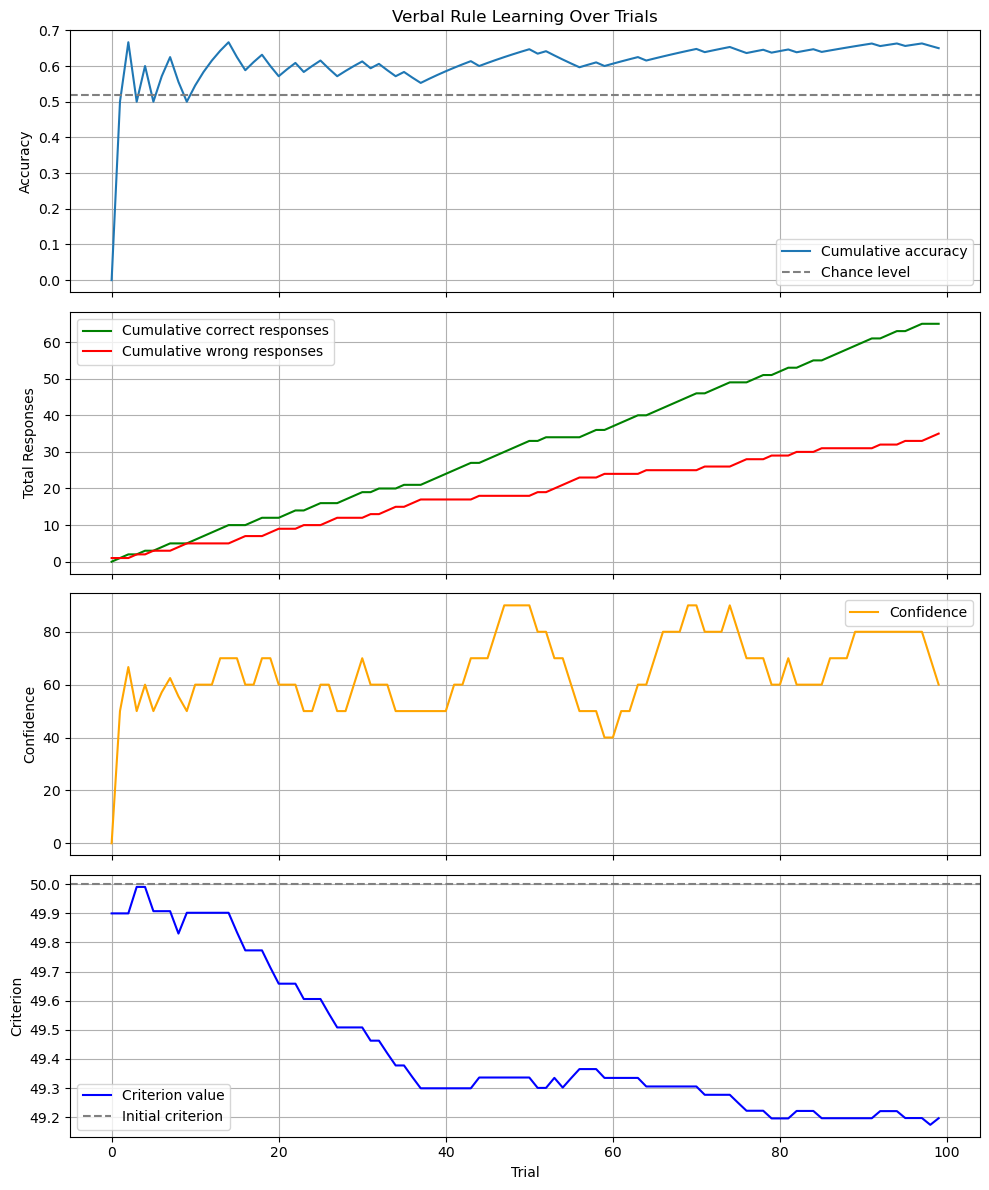

In [40]:
# Shuffle the visual_values array along the first axis (trials)
shuffled_visual_values = np.column_stack((x_values, y_values, answer_values))
np.random.shuffle(shuffled_visual_values)

# Initialize the verbal system with a criterion of 43
vs = VerbalSystemDynamic2(init_criterion=50)

# Prepare to track performance
predictions = []
correct = []
criteria = []
confidences = []
wrong = []  # To track wrong responses

for trial, (x, y, label) in enumerate(shuffled_visual_values):
    pred, updated_crit, confidence = vs.update(x, label)
    predictions.append(pred)
    correct.append(int(pred == label))
    wrong.append(int(pred != label))  # Increment wrong if prediction doesn't match label
    criteria.append(updated_crit)
    confidences.append(confidence)

# First compute cumulative values
cumulative_accuracy = np.cumsum(correct) / np.arange(1, len(correct) + 1)
cumulative_correct = np.cumsum(correct)
cumulative_wrong = np.cumsum(wrong)  # Cumulative wrong responses

# Create four vertically stacked subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# --- First plot: Cumulative Accuracy ---
axs[0].plot(cumulative_accuracy, label='Cumulative accuracy')
axs[0].axhline(chance_level, linestyle='--', color='gray', label='Chance level')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Verbal Rule Learning Over Trials')
axs[0].legend()
axs[0].grid(True)

# --- Second plot: Cumulative Correct and Wrong ---
axs[1].plot(cumulative_correct, color='green', label='Cumulative correct responses')
axs[1].plot(cumulative_wrong, color='red', label='Cumulative wrong responses')
axs[1].set_ylabel('Total Responses')
axs[1].legend()
axs[1].grid(True)

# --- Third plot: Confidence ---
axs[2].plot(confidences, color='orange', label='Confidence')
axs[2].set_ylabel('Confidence')
axs[2].legend()
axs[2].grid(True)

# --- Fourth plot: Criterion over trials ---
axs[3].plot(criteria, color='blue', label='Criterion value')
axs[3].axhline(y=50, color='gray', linestyle='--', label='Initial criterion')
axs[3].set_xlabel('Trial')
axs[3].set_ylabel('Criterion')
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()


Okay, the simulation is suuper bad if set the "first guess" far from the middle, but that also doesn't seem as a probable behavious. So I wont try to fix it. 